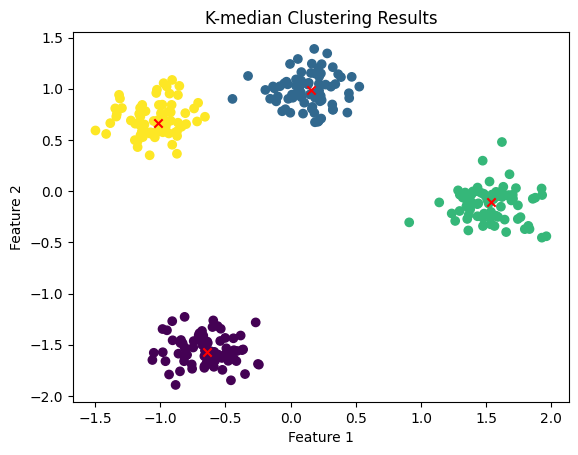

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

def initialize_medians(data, k):
    
    indices = np.random.choice(data.shape[0], k, replace=False)
    return data[indices]

def compute_distances(data, medians):
    
    distances = np.zeros((data.shape[0], medians.shape[0]))
    for i in range(medians.shape[0]):
        distances[:, i] = np.sum(np.abs(data - medians[i]), axis=1)
    return distances

def assign_clusters(distances):
    
    return np.argmin(distances, axis=1)

def update_medians(data, clusters, k):
    
    new_medians = np.zeros((k, data.shape[1]))
    for i in range(k):
        new_medians[i] = np.median(data[clusters == i], axis=0)
    return new_medians

def k_median(data, k, max_iterations=100):
   
    medians = initialize_medians(data, k)
    
    for _ in range(max_iterations):
        
        distances = compute_distances(data, medians)
        
        
        clusters = assign_clusters(distances)
        
        
        new_medians = update_medians(data, clusters, k)
        
        
        if np.all(medians == new_medians):
            break
        
        medians = new_medians
    
    return medians, clusters


data, labels = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


k = 4

medians, clusters = k_median(data_scaled, k)


plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(medians[:, 0], medians[:, 1], c='red', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-median Clustering Results')
plt.show()


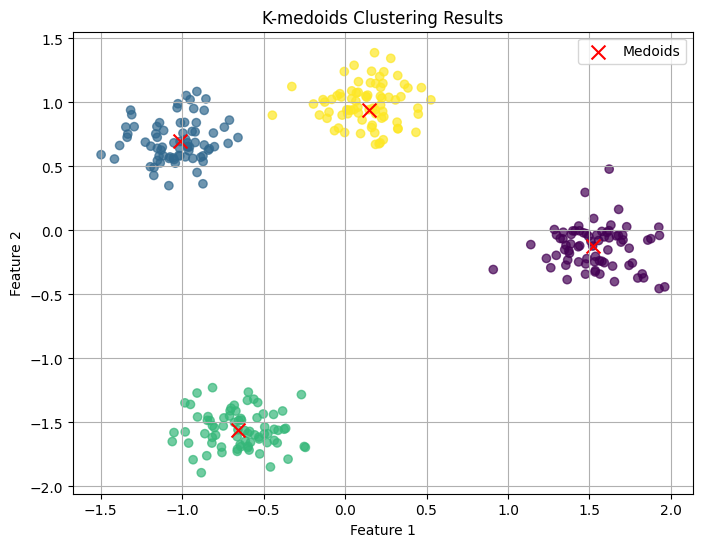

In [6]:
import numpy as np
import random
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def initialize_medoids(data, k):
    
    indices = random.sample(range(data.shape[0]), k)
    return data[indices]

def compute_dissimilarities(data, medoids):
    
    dissimilarities = np.zeros((data.shape[0], medoids.shape[0]))
    for i, medoid in enumerate(medoids):
        dissimilarities[:, i] = np.linalg.norm(data - medoid, axis=1)
    return dissimilarities

def assign_clusters(dissimilarities):
    
    return np.argmin(dissimilarities, axis=1)

def update_medoids(data, clusters, k):
    
    new_medoids = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_data = data[clusters == i]
        cluster_dissimilarities = compute_dissimilarities(cluster_data, cluster_data)
        min_index = np.argmin(np.sum(cluster_dissimilarities, axis=1))
        new_medoids[i] = cluster_data[min_index]
    return new_medoids

def k_medoids(data, k, max_iterations=100):
    """Implement the K-medoids clustering algorithm."""
    
    medoids = initialize_medoids(data, k)
    
    for _ in range(max_iterations):
        
        dissimilarities = compute_dissimilarities(data, medoids)
        
        
        clusters = assign_clusters(dissimilarities)
        
        
        new_medoids = update_medoids(data, clusters, k)
        
        
        if np.array_equal(medoids, new_medoids):
            break
        
        medoids = new_medoids
    
    return medoids, clusters


data, labels = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)


scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


k = 4


medoids, clusters = k_medoids(data_scaled, k)


plt.figure(figsize=(8, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', marker='x', s=100, label='Medoids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-medoids Clustering Results')
plt.legend()
plt.grid(True)
plt.show()
